### Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Import dataset

In [25]:
df = pd.read_csv('generation2.csv')
data_df = df[df['id']==1]
data_df = data_df[data_df['hour']==12]

In [26]:
data_df.head()

,id,fcst_time,time,temperature,humidity,dew_point,wind_dir,wind_spd,uv_idx,visibility,...,cloudiness,precip_prob,precip_1h,year,month,day,hour,minute,second,amount
54,1,1590937537,2020-06-01 12:00:00+09:00,23.8889,50,12.7778,287,13.0357,11,16.0934,...,23,0,0.0,2020,6,1,12,0,0,611.114804
58,1,1590941137,2020-06-01 12:00:00+09:00,23.8889,50,12.7778,287,13.0357,11,16.0934,...,23,0,0.0,2020,6,1,12,0,0,611.114804
62,1,1590944738,2020-06-01 12:00:00+09:00,23.8889,50,12.7778,287,13.0357,11,16.0934,...,23,0,0.0,2020,6,1,12,0,0,611.114804
66,1,1590948335,2020-06-01 12:00:00+09:00,23.8889,50,12.7778,287,13.0357,11,16.0934,...,23,0,0.0,2020,6,1,12,0,0,611.114804
70,1,1590951938,2020-06-01 12:00:00+09:00,23.8889,50,12.7778,287,13.0357,11,16.0934,...,23,0,0.0,2020,6,1,12,0,0,611.114804


### Define x and y

In [27]:
#x = data_df.drop(['id','amount','year','month','day','hour','minute','second','fcst_time','time'], axis = 1).values
#y = data_df['amount'].values

In [62]:
x = data_df.drop(['id','amount','year','month','day','hour','minute','second','fcst_time','time','dew_point','ceiling', 'cloudiness','precip_prob', 'precip_1h','wind_dir','wind_spd'], axis = 1).values
y = data_df['amount'].values

In [63]:
print(x)

[[23.8889 50.     11.     16.0934]
 [23.8889 50.     11.     16.0934]
 [23.8889 50.     11.     16.0934]
 ...
 [26.6667 65.     11.     11.2654]
 [26.6667 65.     11.     11.2654]
 [26.6667 65.     11.     11.2654]]


In [64]:
print(y)

[611.1148041 611.1148041 611.1148041 ... 327.7246998 327.7246998
 327.7246998]


### Split the dataset in training set and test set 

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 

### Train the model on the training set

In [66]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [68]:
ml.predict([[23.8889, 50., 11., 16.0934]])

array([514.27863362])

### Predict the test set results

In [69]:
y_pred=ml.predict(x_test)
print(y_pred)

[633.29438682 398.07366616 455.08109035 ... 395.42914493 473.91047027
 371.7464511 ]


### Evaluate the model

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.47411568072688093

### Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

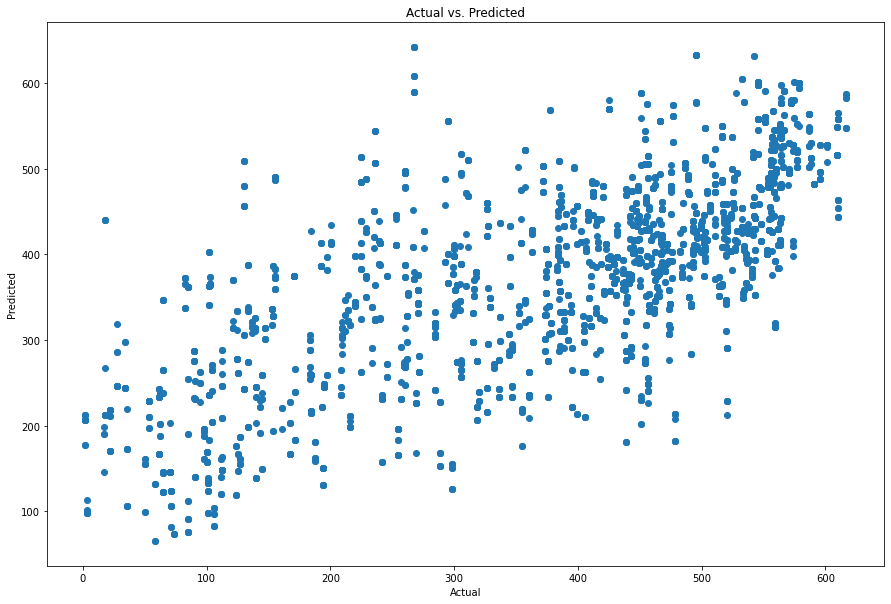

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

### Predicted values

In [61]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:]

,Actual Value,Predicted value,Difference
0,495.304136,634.779276,-139.475140
1,456.105831,390.334999,65.770831
2,457.187187,449.119199,8.067989
3,235.216749,446.598548,-211.381799
4,502.576070,398.234981,104.341089
...,...,...,...
3559,595.408422,484.154992,111.253430
3560,352.676419,320.687846,31.988573
3561,427.180208,393.427391,33.752817
3562,504.116998,473.734760,30.382237
